In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import ExtraTreesRegressor

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, mean_squared_error

In [40]:
billing = pd.read_csv('NoSurpriseBillingER.csv')

In [41]:
billing.head()

,States,Spending_Per_Person_ER,Out_of_Pocket_Spending_Per_Person_ER,Visits_Per_1000_People_ER,Average_Price_ER,Average_Out_of_Pocket_Price_ER,Malpractice payment amount per physician,Specialists per state,White,Black,...,65+,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Cost of Living,Total HHI_Health Insurance,Total HHI_Hospital Inpatient Services
0,Arkansas,85.85,29.41,202.21,424.53,145.45,1754.84,52.22,72.1,15.2,...,17.3,42.0,5.4,26.2,15.9,1.4,9.1,86.9,3054,2739
1,California,233.12,46.62,126.25,1846.52,369.26,1693.24,52.89,36.4,5.3,...,14.9,48.0,6.6,25.3,11.4,0.9,7.8,151.7,2161,13407
2,Connecticut,240.31,60.05,165.11,1455.48,363.70,4810.00,56.83,65.7,10.0,...,17.7,52.9,4.8,21.5,14.1,0.7,5.9,127.7,2193,3136
3,Florida,241.76,56.06,194.89,1240.50,287.67,4936.99,53.04,53.0,15.0,...,21.1,40.3,9.5,17.4,18.0,1.7,13.1,97.9,2358,3382
4,Illinois,156.13,40.34,183.42,851.21,219.91,5711.64,49.65,60.9,13.6,...,16.0,54.6,5.2,18.2,14.1,0.7,7.3,94.5,3913,3898


In [42]:
billing.columns

Index(['States', 'Spending_Per_Person_ER',
       'Out_of_Pocket_Spending_Per_Person_ER', 'Visits_Per_1000_People_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services'],
      dtype='object')

In [43]:
correlation_table = billing[['States', 'Spending_Per_Person_ER',
       'Out_of_Pocket_Spending_Per_Person_ER', 'Visits_Per_1000_People_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']]

In [44]:
correlation_table.corr()

,Spending_Per_Person_ER,Out_of_Pocket_Spending_Per_Person_ER,Visits_Per_1000_People_ER,Average_Price_ER,Average_Out_of_Pocket_Price_ER,Malpractice payment amount per physician,Specialists per state,White,Black,Hispanic,...,65+,Employer,Non-Group,Medicaid,Medicare,Military,Uninsured,Cost of Living,Total HHI_Health Insurance,Total HHI_Hospital Inpatient Services
Spending_Per_Person_ER,1.000000,0.494189,-0.339441,0.847080,0.668649,0.305898,0.149725,-0.153638,-0.336852,0.491311,...,0.071736,0.214773,0.343611,-0.241048,-0.077333,-0.307677,-0.058069,0.376304,-0.242359,0.281851
Out_of_Pocket_Spending_Per_Person_ER,0.494189,1.000000,0.178392,0.273943,0.724601,0.011256,-0.277765,0.235148,-0.456392,0.024463,...,0.055352,0.033922,0.122674,-0.324531,0.117947,0.130542,0.378299,-0.178515,-0.007209,0.053222
Visits_Per_1000_People_ER,-0.339441,0.178392,1.000000,-0.755501,-0.538754,0.028004,-0.112765,0.201714,0.407891,-0.582541,...,0.155416,-0.462600,-0.272324,0.108908,0.385196,0.597451,0.522768,-0.718777,0.759017,-0.476902
Average_Price_ER,0.847080,0.273943,-0.755501,1.000000,0.779078,0.144730,0.153018,-0.283283,-0.450964,0.707167,...,-0.096551,0.318649,0.364275,-0.143528,-0.316607,-0.506492,-0.255028,0.660292,-0.539462,0.572638
Average_Out_of_Pocket_Price_ER,0.668649,0.724601,-0.538754,0.779078,1.000000,-0.045952,-0.155404,0.041228,-0.657021,0.436756,...,-0.079038,0.297817,0.285539,-0.298997,-0.178321,-0.278812,-0.019907,0.347705,-0.489428,0.447321
Malpractice payment amount per physician,0.305898,0.011256,0.028004,0.144730,-0.045952,1.000000,0.222861,-0.402511,0.264823,0.281717,...,0.026746,0.037435,-0.047784,0.106984,-0.099944,-0.459861,-0.089408,0.207449,-0.038690,-0.386810
Specialists per state,0.149725,-0.277765,-0.112765,0.153018,-0.155404,0.222861,1.000000,-0.304049,0.346138,0.128853,...,-0.333884,0.108983,0.007776,0.290802,-0.484977,-0.291623,-0.374906,0.276310,-0.132955,-0.113896
White,-0.153638,0.235148,0.201714,-0.283283,0.041228,-0.402511,-0.304049,1.000000,-0.508988,-0.766485,...,0.254286,0.189697,-0.209292,-0.320081,0.490551,0.135704,-0.114821,-0.440263,0.055635,-0.396368
Black,-0.336852,-0.456392,0.407891,-0.450964,-0.657021,0.264823,0.346138,-0.508988,1.000000,-0.120272,...,-0.011189,-0.375950,-0.146809,0.421309,-0.074396,0.308013,0.080766,-0.116720,0.476279,-0.212138
Hispanic,0.491311,0.024463,-0.582541,0.707167,0.436756,0.281717,0.128853,-0.766485,-0.120272,1.000000,...,-0.213933,0.028902,0.449402,0.059262,-0.464906,-0.401016,0.049620,0.552415,-0.420604,0.620675


In [45]:

billing.median()

C:\Users\589598\AppData\Local\Temp\1/ipykernel_10844/1167046430.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  billing.median()


Spending_Per_Person_ER                       191.91
Out_of_Pocket_Spending_Per_Person_ER          49.63
Visits_Per_1000_People_ER                    186.33
Average_Price_ER                             975.30
Average_Out_of_Pocket_Price_ER               263.40
Malpractice payment amount per physician    3600.36
Specialists per state                         52.89
White                                         65.70
Black                                         10.00
Hispanic                                      11.10
Asian                                          2.70
American Indian/Alaska Native                  0.30
Native Hawaiian/Other Pacific Islander         0.00
Multiple Races                                 2.40
Children 0-18                                 23.30
Adults 19-25                                   8.60
Adults 26-34                                  11.70
Adults 35-54                                  25.40
Adults 55-64                                  13.60
65+         

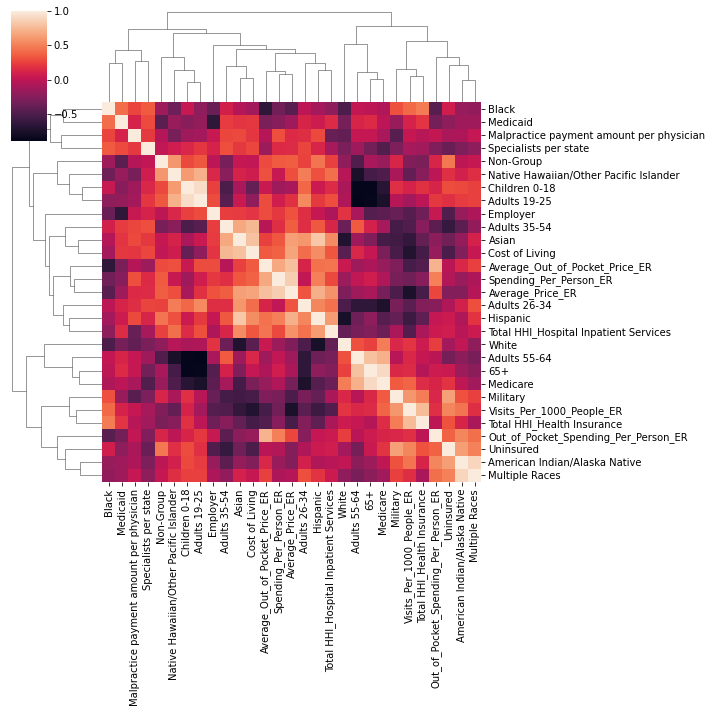

In [46]:
sns.clustermap(correlation_table.corr());

In [47]:
# Define X and y.
# 1st run
feature_cols = ['Out_of_Pocket_Spending_Per_Person_ER', 'Visits_Per_1000_People_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Spending_Per_Person_ER'] 

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [49]:
lr =LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [50]:
lr.fit(X_train,y_train)

LinearRegression()

In [51]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.39959128299992325, 'Average_Price_ER'),
 (0.17802832018593626, 'Out_of_Pocket_Spending_Per_Person_ER'),
 (0.07817297652465795, 'Average_Out_of_Pocket_Price_ER'),
 (0.07053271354677536, 'Hispanic'),
 (0.032275202780240674, 'White'),
 (0.030153963091652594, 'Adults 26-34'),
 (0.021765044774292676, 'Malpractice payment amount per physician'),
 (0.021739312485312124, 'Native Hawaiian/Other Pacific Islander'),
 (0.018527886443026446, 'Medicare'),
 (0.01832450738571248, 'Total HHI_Health Insurance'),
 (0.016297529476470854, 'Non-Group'),
 (0.013030715882032539, 'Children 0-18'),
 (0.012694961051190438, 'American Indian/Alaska Native'),
 (0.012343352066343098, 'Black'),
 (0.012163748281587934, '65+'),
 (0.010603332228832165, 'Adults 55-64'),
 (0.008379298632937812, 'Specialists per state'),
 (0.00619464474880309, 'Adults 35-54'),
 (0.0061659701747348115, 'Cost of Living'),
 (0.005799045618900687, 'Employer'),
 (0.00478040416048145, 'Military'),
 (0.004413888520332727, 'Visits_Per_1000_Peo

In [52]:
# Define X and y.
# 2nd run
feature_cols = ['Spending_Per_Person_ER', 'Visits_Per_1000_People_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Out_of_Pocket_Spending_Per_Person_ER'] 

In [53]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.3499227053462213, 'Average_Price_ER'),
 (0.22034840216495952, 'Spending_Per_Person_ER'),
 (0.0839395550978751, 'Average_Out_of_Pocket_Price_ER'),
 (0.06433361546122478, 'Hispanic'),
 (0.03375191886710243, 'Total HHI_Health Insurance'),
 (0.02830071957067835, 'White'),
 (0.027741229071932466, 'Native Hawaiian/Other Pacific Islander'),
 (0.025733729031503907, 'Non-Group'),
 (0.01948555239517112, 'American Indian/Alaska Native'),
 (0.01925461719750181, 'Adults 26-34'),
 (0.014540067726301724, 'Children 0-18'),
 (0.013632405894350514, 'Medicaid'),
 (0.011251743182947957, 'Cost of Living'),
 (0.010722831937304016, 'Multiple Races'),
 (0.01052775685610246, 'Visits_Per_1000_People_ER'),
 (0.01027643318968295, 'Black'),
 (0.009947868603149107, 'Specialists per state'),
 (0.0075271611096521356, '65+'),
 (0.007033450543619476, 'Medicare'),
 (0.00583370099472269, 'Adults 55-64'),
 (0.0050200332398262874, 'Asian'),
 (0.004721156015666238, 'Malpractice payment amount per physician'),
 (0.004521

In [56]:
# Define X and y.
# 3rd run
feature_cols = ['Spending_Per_Person_ER','Out_of_Pocket_Spending_Per_Person_ER',
       'Average_Price_ER', 'Average_Out_of_Pocket_Price_ER',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Visits_Per_1000_People_ER'] 

In [57]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.3153153879112314, 'Average_Price_ER'),
 (0.18780396396847127, 'Spending_Per_Person_ER'),
 (0.10701755603995888, 'Average_Out_of_Pocket_Price_ER'),
 (0.06446976819688337, 'Hispanic'),
 (0.03507794927373954, 'Total HHI_Health Insurance'),
 (0.02867398146601731, 'White'),
 (0.023785276547223056, 'Non-Group'),
 (0.023567376121152128, 'Adults 26-34'),
 (0.020344889769622204, 'Malpractice payment amount per physician'),
 (0.01826073915883975, 'American Indian/Alaska Native'),
 (0.01757881282075753, 'Cost of Living'),
 (0.014920622792748821, 'Native Hawaiian/Other Pacific Islander'),
 (0.014896964098042207, 'Specialists per state'),
 (0.013783273764803776, 'Black'),
 (0.013065550214050627, 'Children 0-18'),
 (0.012729752765090223, 'Out_of_Pocket_Spending_Per_Person_ER'),
 (0.012175766018068803, 'Medicare'),
 (0.011794126153223103, '65+'),
 (0.011471000709990308, 'Employer'),
 (0.011211660581404327, 'Adults 55-64'),
 (0.010084726479580319, 'Medicaid'),
 (0.009904903699117342, 'Military'),


In [59]:
# Define X and y.
# 4th run
feature_cols = ['Visits_Per_1000_People_ER', 'Spending_Per_Person_ER','Out_of_Pocket_Spending_Per_Person_ER',
       'Average_Out_of_Pocket_Price_ER',
       'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Average_Price_ER'] 

In [60]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.3593473359345857, 'Out_of_Pocket_Spending_Per_Person_ER'),
 (0.1968961329604604, 'Visits_Per_1000_People_ER'),
 (0.08145984486817374, 'Average_Out_of_Pocket_Price_ER'),
 (0.056551257650507746, 'Hispanic'),
 (0.04486007444328452, 'Total HHI_Health Insurance'),
 (0.029705378853830604, 'Adults 26-34'),
 (0.02034900611496512, 'White'),
 (0.01980566825185116, 'Malpractice payment amount per physician'),
 (0.019656581222506003, 'Non-Group'),
 (0.019170542793943236, 'Medicare'),
 (0.018391598571789236, 'Black'),
 (0.016586878341519944, 'Native Hawaiian/Other Pacific Islander'),
 (0.016205177134679408, 'American Indian/Alaska Native'),
 (0.013506895091912162, '65+'),
 (0.010730126002623462, 'Medicaid'),
 (0.010585916054270223, 'Children 0-18'),
 (0.007724150921419911, 'Specialists per state'),
 (0.0076790715898646, 'Asian'),
 (0.00668282880993049, 'Cost of Living'),
 (0.0066387534456543605, 'Military'),
 (0.0062283190086724486, 'Adults 55-64'),
 (0.005963393727723355, 'Spending_Per_Person_

In [61]:
# Define X and y.
# 5th run
feature_cols = ['Visits_Per_1000_People_ER', 'Spending_Per_Person_ER','Out_of_Pocket_Spending_Per_Person_ER','Average_Price_ER'
       , 'Malpractice payment amount per physician', 'Specialists per state',
       'White', 'Black', 'Hispanic', 'Asian', 'American Indian/Alaska Native',
       'Native Hawaiian/Other Pacific Islander', 'Multiple Races',
       'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54',
       'Adults 55-64', '65+', 'Employer', 'Non-Group', 'Medicaid', 'Medicare',
       'Military', 'Uninsured', 'Cost of Living', 'Total HHI_Health Insurance',
       'Total HHI_Hospital Inpatient Services']

X = billing[feature_cols]
y = billing['Average_Out_of_Pocket_Price_ER'] 

In [62]:
features = ExtraTreesRegressor()
features.fit(X_train,y_train)
sorted(list(zip(features.feature_importances_,X)), reverse=True)

[(0.3502034579288831, 'Out_of_Pocket_Spending_Per_Person_ER'),
 (0.18278178481028598, 'Visits_Per_1000_People_ER'),
 (0.10272821195523182, 'Average_Price_ER'),
 (0.049746742512016454, 'Hispanic'),
 (0.0329321522045203, 'Adults 26-34'),
 (0.032054309446902254, 'White'),
 (0.023908661212119493, 'Total HHI_Health Insurance'),
 (0.02371830175122829, 'Non-Group'),
 (0.02109001000332295, 'Native Hawaiian/Other Pacific Islander'),
 (0.018441009975438162, 'Specialists per state'),
 (0.018365817664892464, 'Medicare'),
 (0.017467806823882156, 'American Indian/Alaska Native'),
 (0.015317485061158693, 'Cost of Living'),
 (0.014708710238259521, '65+'),
 (0.013079187489565562, 'Malpractice payment amount per physician'),
 (0.01205082708589792, 'Spending_Per_Person_ER'),
 (0.010849887077333493, 'Children 0-18'),
 (0.010419393377881113, 'Black'),
 (0.007518158000128343, 'Medicaid'),
 (0.007004766329950014, 'Adults 19-25'),
 (0.006333929139483437, 'Total HHI_Hospital Inpatient Services'),
 (0.005150222